In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd


In [2]:
A = pd.read_csv("D:/Data Science/Machine learinng/Project/beer production/monthly_beer_production.csv")

In [3]:
A.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


# Convert Date

In [4]:
A.DATE = pd.to_datetime(A.Month)

In [5]:
A.DATE

0     1956-01-01
1     1956-02-01
2     1956-03-01
3     1956-04-01
4     1956-05-01
         ...    
471   1995-04-01
472   1995-05-01
473   1995-06-01
474   1995-07-01
475   1995-08-01
Name: Month, Length: 476, dtype: datetime64[ns]

# Make Month as index and drop it as a column


In [6]:
A.index = A.DATE
A

,Month,Monthly beer production
Month,,
1956-01-01,1956-01,93.2
1956-02-01,1956-02,96.0
1956-03-01,1956-03,95.2
1956-04-01,1956-04,77.1
1956-05-01,1956-05,70.9
...,...,...
1995-04-01,1995-04,127.0
1995-05-01,1995-05,151.0
1995-06-01,1995-06,130.0


In [7]:
A = A.drop(labels= ["Month"],axis=1)


In [8]:
A

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


# plot and decompose

In [9]:
import matplotlib.pyplot as plt

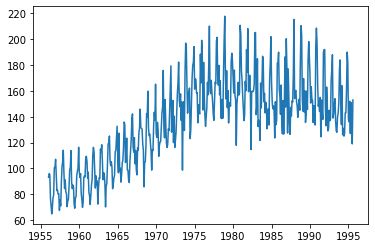

In [10]:
plt.plot(A)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(A,model="multiplicative")

<AxesSubplot:xlabel='Month'>

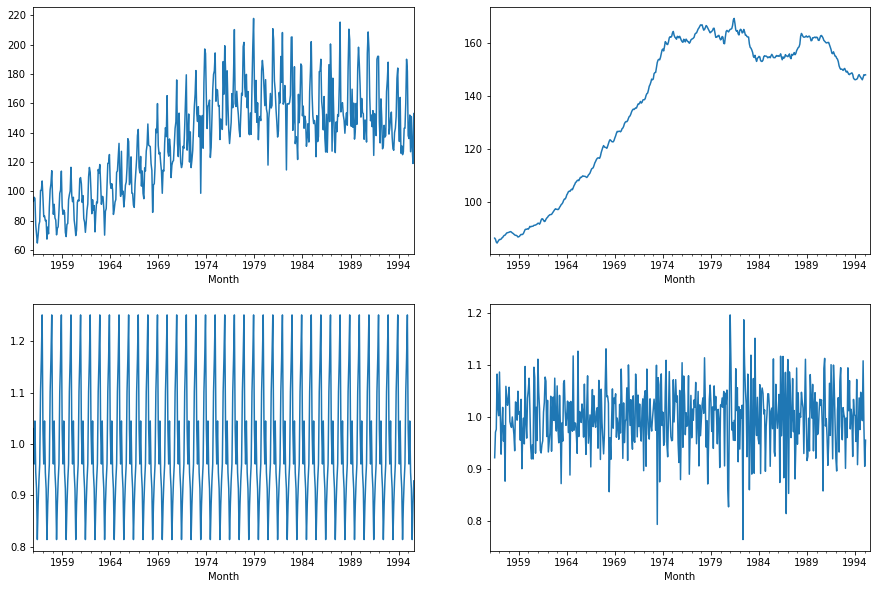

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sd.observed.plot()

plt.subplot(2,2,2)
sd.trend.plot()

plt.subplot(2,2,3)
sd.seasonal.plot()

plt.subplot(2,2,4)
sd.resid.plot()

# Rolling mean and Rolling Stdev

In [13]:
RM = A.rolling(window=12).mean()
RSD = A.rolling(window=12).std()


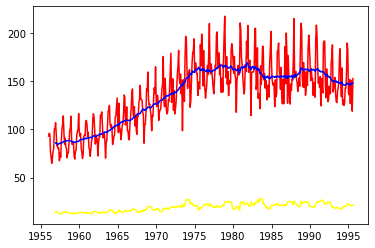

In [14]:
plt.plot(A,c="red")
plt.plot(RM,c="blue")
plt.plot(RSD,c="yellow")


# Conversion attempt 1:

Convert TS --> Log

In [15]:
import numpy as np


In [16]:
A_log = np.log(A)
RM_log = A_log.rolling(window=12).mean()
RSD_log = RM_log.rolling(window=12).std()

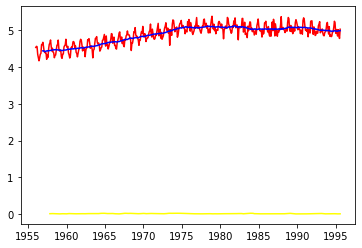

In [17]:
plt.plot(A_log,c="red")
plt.plot(RM_log,c="blue")
plt.plot(RSD_log,c="yellow")

# Conversion attempt 2:
    

In [18]:
A_log = np.log(A)
RM_log = A_log.rolling(window=12).mean()
RSD_log = RM_log.rolling(window=12).std()
TS= A_log - RM_log


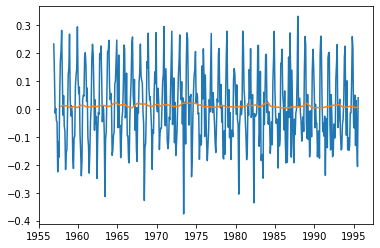

In [19]:
plt.plot(TS)
plt.plot(RSD_log)

# Remove Null Values

In [20]:
TS_new = TS[TS["Monthly beer production"].isna()==False]

# Divide data in training and testing set

In [21]:
TS_new.shape

(465, 1)

In [22]:
465*0.8

372.0

In [23]:
training_data = TS_new[0:372]
testing_data = TS_new[372:]

In [24]:
training_data.shape

(372, 1)

In [25]:
testing_data.shape

(93, 1)

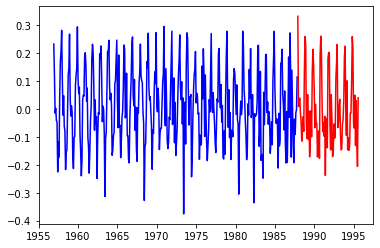

In [26]:
plt.plot(training_data,c="blue")
plt.plot(testing_data,c="red")

# Forecast

In [52]:
from statsmodels.tsa.ar_model import AutoReg

In [53]:
model = AutoReg(training_data,lags=60).fit()

C:\Users\Mahesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
testing_data


,Monthly beer production
Month,
1987-12-01,0.331148
1988-01-01,0.008357
1988-02-01,0.022923
1988-03-01,0.038058
1988-04-01,-0.015030
...,...
1995-04-01,-0.131444
1995-05-01,0.029809
1995-06-01,-0.123205


In [55]:
pred = model.predict(start="1987-12-01",end="1995-08-01")

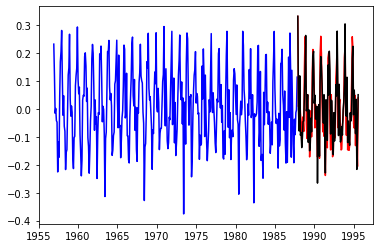

In [56]:
plt.plot(training_data,c="blue")
plt.plot(testing_data,c="red")
plt.plot(pred,c="black")

In [57]:
R = RM_log[RM_log["Monthly beer production"].isna()==False]

In [58]:
pd.DataFrame(np.exp(pred+RM_log.tail(93)["Monthly beer production"]),columns=A.columns)

,Monthly beer production
1987-12-01,215.407744
1988-01-01,152.486537
1988-02-01,143.854747
1988-03-01,173.797083
1988-04-01,140.316742
...,...
1995-04-01,132.591604
1995-05-01,151.693420
1995-06-01,118.417355
1995-07-01,133.737105


In [59]:
A.tail(93)

,Monthly beer production
Month,
1987-12-01,215.3
1988-01-01,154.1
1988-02-01,159.3
1988-03-01,160.4
1988-04-01,151.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0
